In [2]:
import numpy as np
import matplotlib.pyplot as plt

from math import sin,cos
from scipy.integrate import odeint


# COUPLED Harmonic oscillator

In [68]:
def coupling(w, t, p):
    """
    The general case for two coupled harmonic oscilation.
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, k12 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (+k12*x2-(k1+k12)*x1) / m1,
         y2,
         (+k12*x1-(k2+k12)*x2) / m2]
    return f

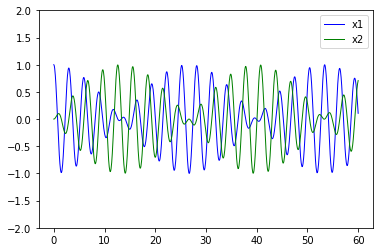

In [69]:

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 4.0
k2 = 4.0
k12= 0.5
# Initial conditions
x1 = 1.0
y1 = 0.0
x2 = 0.0
y2 = 0.0

te = 60.0
tstep = 1000

# time setting 
t = [te * float(i) / (tstep - 1) for i in range(tstep)]

# the parameters and initial conditions:
p = [m1, m2, k1, k2, k12]
w0 = [x1, y1, x2, y2]

# solve ode 
wsol = odeint(vectorfield, w0, t, args=(p,))


x1_s=[]
x2_s=[]
y1_s=[]
y2_s=[]
for i in range(1000):
    x1_s.append(wsol[i][0])
    x2_s.append(wsol[i][2])
    y1_s.append(wsol[i][1])
    y2_s.append(wsol[i][3])

# Plot 

plt.ylim(-2,2)
plt.plot(t, x1_s, 'b', linewidth=lw,label='x1')
plt.plot(t, x2_s, 'g', linewidth=lw,label='x2')



plt.legend()


# SIMPLY  PENDULUM

In [6]:
def Pendulum(w, t, p):
    """
The case of simply pendulum.
    """
    x1, y1= w
    l,g = p
    f = [y1,
         -g*np.sin(x1)/l]
    return f

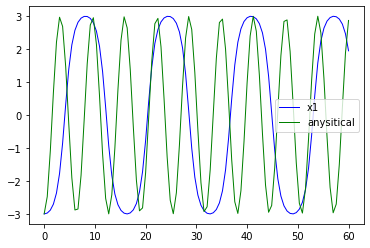

In [71]:

# Parameter values
# Masses:
g=9.8
# Spring constants
l=10
# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = -3
y1 = 0.0

te = 60.0
tstep = 100

# Create the time samples for the output of the ODE solver.
t = [te * float(i) / (tstep - 1) for i in range(tstep)]

# Pack up the parameters and initial conditions:
p = [l,g]
w0 = [x1, y1]

# Call the ODE solver.
wsol = odeint(Pendulum, w0, t, args=(p,))


#with open('two_springs.dat', 'w') as f:
    # Print & save the solution.
    #for t1, w1 in zip(t, wsol):
        #print >> f, t1, w1[0], w1[1], w1[2], w1[3]
x1_s=[]
x2_s=[]
y1_s=[]
y2_s=[]
for i in range(tstep):
    x1_s.append(wsol[i][0])
    y1_s.append(wsol[i][1])


# Plot the solution that was generated

#figure(1, figsize=(6, 4.5))
k=(g/l)**(1/2)
#xlabel('t')
#grid(True)
#hold(True)
lw = 1
t=np.array(t)
#plt.ylim(0,2)
plt.plot(t, np.array(x1_s), 'b', linewidth=lw,label='x1')
plt.plot(t, np.cos(k*t)*x1, 'g', linewidth=lw,label='anysitical')
#plot(t, -np.array(x1_s)+np.array(x2_s)/2, '--y', linewidth=lw,label='antisymmetrical')
#plot(t, np.array(x1_s)+np.array(x2_s)/2, '--r', linewidth=lw,label='symmetrical')


plt.legend()
#legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))


# DOUBLE PENDULUM

In [58]:


state = np.array([0.0,0.0,0.0,0.0])

m1=1.0
m2=2.0
l1=1.0
l2=2.0

con=[m1,m2,l1,l2]


def dPendulum(w, t):
        
        th1, th2, u1, u2 = w
        m1, m2, l1, l2 = con[0], con[1], con[2], con[3]
        """
        [
                a b 
                d e     
        ][du1 du2]=
        -[
                e
                f
        ]
        """
        a = l1*l1*(m1+m2)  
        b = l1*m2*l2*cos(th1-th2)
        c = l1*(m2*l2*sin(th1-th2)*u2*u2 + (m1+m2)*g*sin(th1))
        d = m2*l2*l1*cos(th1-th2) 
        e = m2*l2*l2 
        f = m2*l2*(-l1*sin(th1-th2)*u1*u1 + g*sin(th2))

        du1, du2 = np.linalg.solve([[a,b],[d,e]], [-c,-f])

        return np.array([u1, u2, du1, du2])

In [61]:


def move(state,dPendulum,con, ts, te, tstep):
    """
    ts: start time 
    te: end time
    tstep: time step scale 
    """

    t = np.arange(ts, te, tstep)
    path = odeint(dPendulum, state, t)
    th1_p, th2_p = path[:,0], path[:, 1]
    l1, l2 = con[2], con[3]
    x1 = l1*np.sin(th1_p)
    y1 = -l1*np.cos(th1_p)
    x2 = x1 + l2*np.sin(th2_p)
    y2 = y1 - l2*np.cos(th2_p)
    state = path[-1,:].copy() 
    return [x1, y1, x2, y2]

[1. 1. 0. 0.]


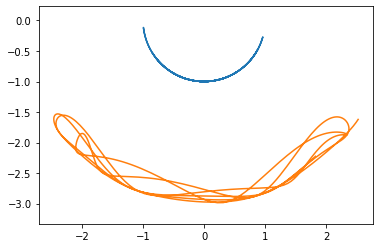

In [62]:

th1, th2 = 1.0, 1.0
state[:2] = th1, th2
print(state)

x1, y1, x2, y2 = move(state,dPendulum,con, 0, 10, 0.02)
plt.plot(x1,y1)
plt.plot(x2,y2)


plt.axis("equal")
plt.show()